In [1]:
import datetime
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import *

In [2]:
def load_data(type_text):
    f_data = open('../emnist/emnist-byclass-'+ type_text + '-images-idx3-ubyte')
    f_data = np.fromfile(file=f_data, dtype=np.uint8)
    f_data = f_data[16:].reshape(-1, 28, 28).astype(np.uint8)
    f_label = open('../emnist/emnist-byclass-'+ type_text + '-labels-idx1-ubyte')
    f_label = np.fromfile(file=f_label, dtype=np.uint8)
    f_label = f_label[8:].reshape(-1).astype(np.uint8)
    return f_data, f_label

In [3]:
train_data, train_label = load_data('train')
test_data, test_label = load_data('test')

In [4]:
# Validation data size: Train=697,932, Test=116,323
print("Train data size: {train}, Test data size: {test}".format(train=len(train_data), test=len(test_data)))

Train data size: 697932, Test data size: 116323


In [5]:
train_label = to_categorical(train_label, num_classes=62, dtype='uint8')
test_label = to_categorical(test_label, num_classes=62, dtype='uint8')

In [6]:
log_dir = "log/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [7]:
# Reshape Training Data
train_data = train_data.reshape((train_data.shape[0], 28, 28, 1))

# Reshape Testing Data
test_data = test_data.reshape((test_data.shape[0], 28, 28, 1))

In [8]:
train_data.shape

(697932, 28, 28, 1)

In [9]:
train_label.shape

(697932, 62)

In [ ]:
# create model
model = Sequential()

# =====add layer=====
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(BatchNormalization())

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same',  activation ='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(62, activation = "softmax"))
# ===================

# # Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
plot_model(model_3, to_file="image/baseline_model.png", show_shapes=True)

In [ ]:
# Baseline: Test Data Accuracy = 0.87
model.fit(train_data, train_label, epochs=20, batch_size=512, verbose=2, shuffle=True, validation_split=0.1, callbacks=[tensorboard_callback])

In [ ]:
results = model.evaluate(test_data, test_label)

In [ ]:
model.save('saved_model/baseline_model')

In [ ]:
# create model
model_2 = Sequential()

# =====add layer=====
model_2.add(Conv2D(6, kernel_size=5, strides=1, padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model_2.add(BatchNormalization())

model_2.add(Conv2D(16, kernel_size=5, strides=1, padding = 'Same', activation ='relu'))
model_2.add(BatchNormalization())

model_2.add(AveragePooling2D(pool_size=2, strides=2, padding='valid'))
model_2.add(Dropout(0.3))

model_2.add(Conv2D(32, kernel_size=5, strides=1, padding = 'Same', activation ='relu'))
model_2.add(BatchNormalization())

model_2.add(Conv2D(64, kernel_size=5, strides=1, padding = 'Same', activation ='relu'))
model_2.add(BatchNormalization())
model_2.add(AveragePooling2D(pool_size=2, strides=2, padding='valid'))
model_2.add(Dropout(0.3))

model_2.add(Conv2D(128, kernel_size=5, strides=1, padding = 'Same',  activation ='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.3))

model_2.add(Flatten())

model_2.add(Dense(256, activation = "relu"))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.25))

model_2.add(Dense(62, activation = "softmax"))
# ===================

# # Compile model
opt = Adam(learning_rate=0.005)
model_2.compile(loss='CategoricalCrossentropy', optimizer=opt, metrics=['accuracy'])
model_2.summary()
plot_model(model_3, to_file="image/improvement_1_model.png", show_shapes=True)

In [ ]:
model_2.fit(train_data, train_label, epochs=30, verbose=2, batch_size=512, shuffle=True, validation_split=0.1, callbacks=[tensorboard_callback])

In [ ]:
model_2.evaluate(test_data, test_label)

In [ ]:
model_2.save('saved_model/improvement_model_1')

In [13]:
# load model
model = tf.keras.models.load_model('saved_model/baseline_model')
model_2 = tf.keras.models.load_model('saved_model/improvement_model_1')

In [16]:
results = model.evaluate(test_data, test_label)

3636/3636 [==============================] - 18s 5ms/step - loss: 0.3160 - accuracy: 0.8811


In [15]:
model_2.evaluate(test_data, test_label)

3636/3636 [==============================] - 14s 4ms/step - loss: 0.3243 - accuracy: 0.8786


[0.32428234815597534, 0.8786396384239197]

In [17]:
pred_Y = model.predict(test_data)

In [ ]:
# DRAW confusion-matrix

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
pred_Y = np.argmax(pred_Y, axis=1)

In [20]:
true_Y = np.argmax(test_label, axis=1)

In [21]:
conf_matrix = confusion_matrix(true_Y, pred_Y)

In [22]:
import string

axis_labels = [] # labels for axis

# push 0~9
for d in string.digits:
    axis_labels.append(d)

# push A~Z
for uc in string.ascii_uppercase:
    axis_labels.append(uc)

# push a~z
for ul in string.ascii_lowercase:
    axis_labels.append(ul)

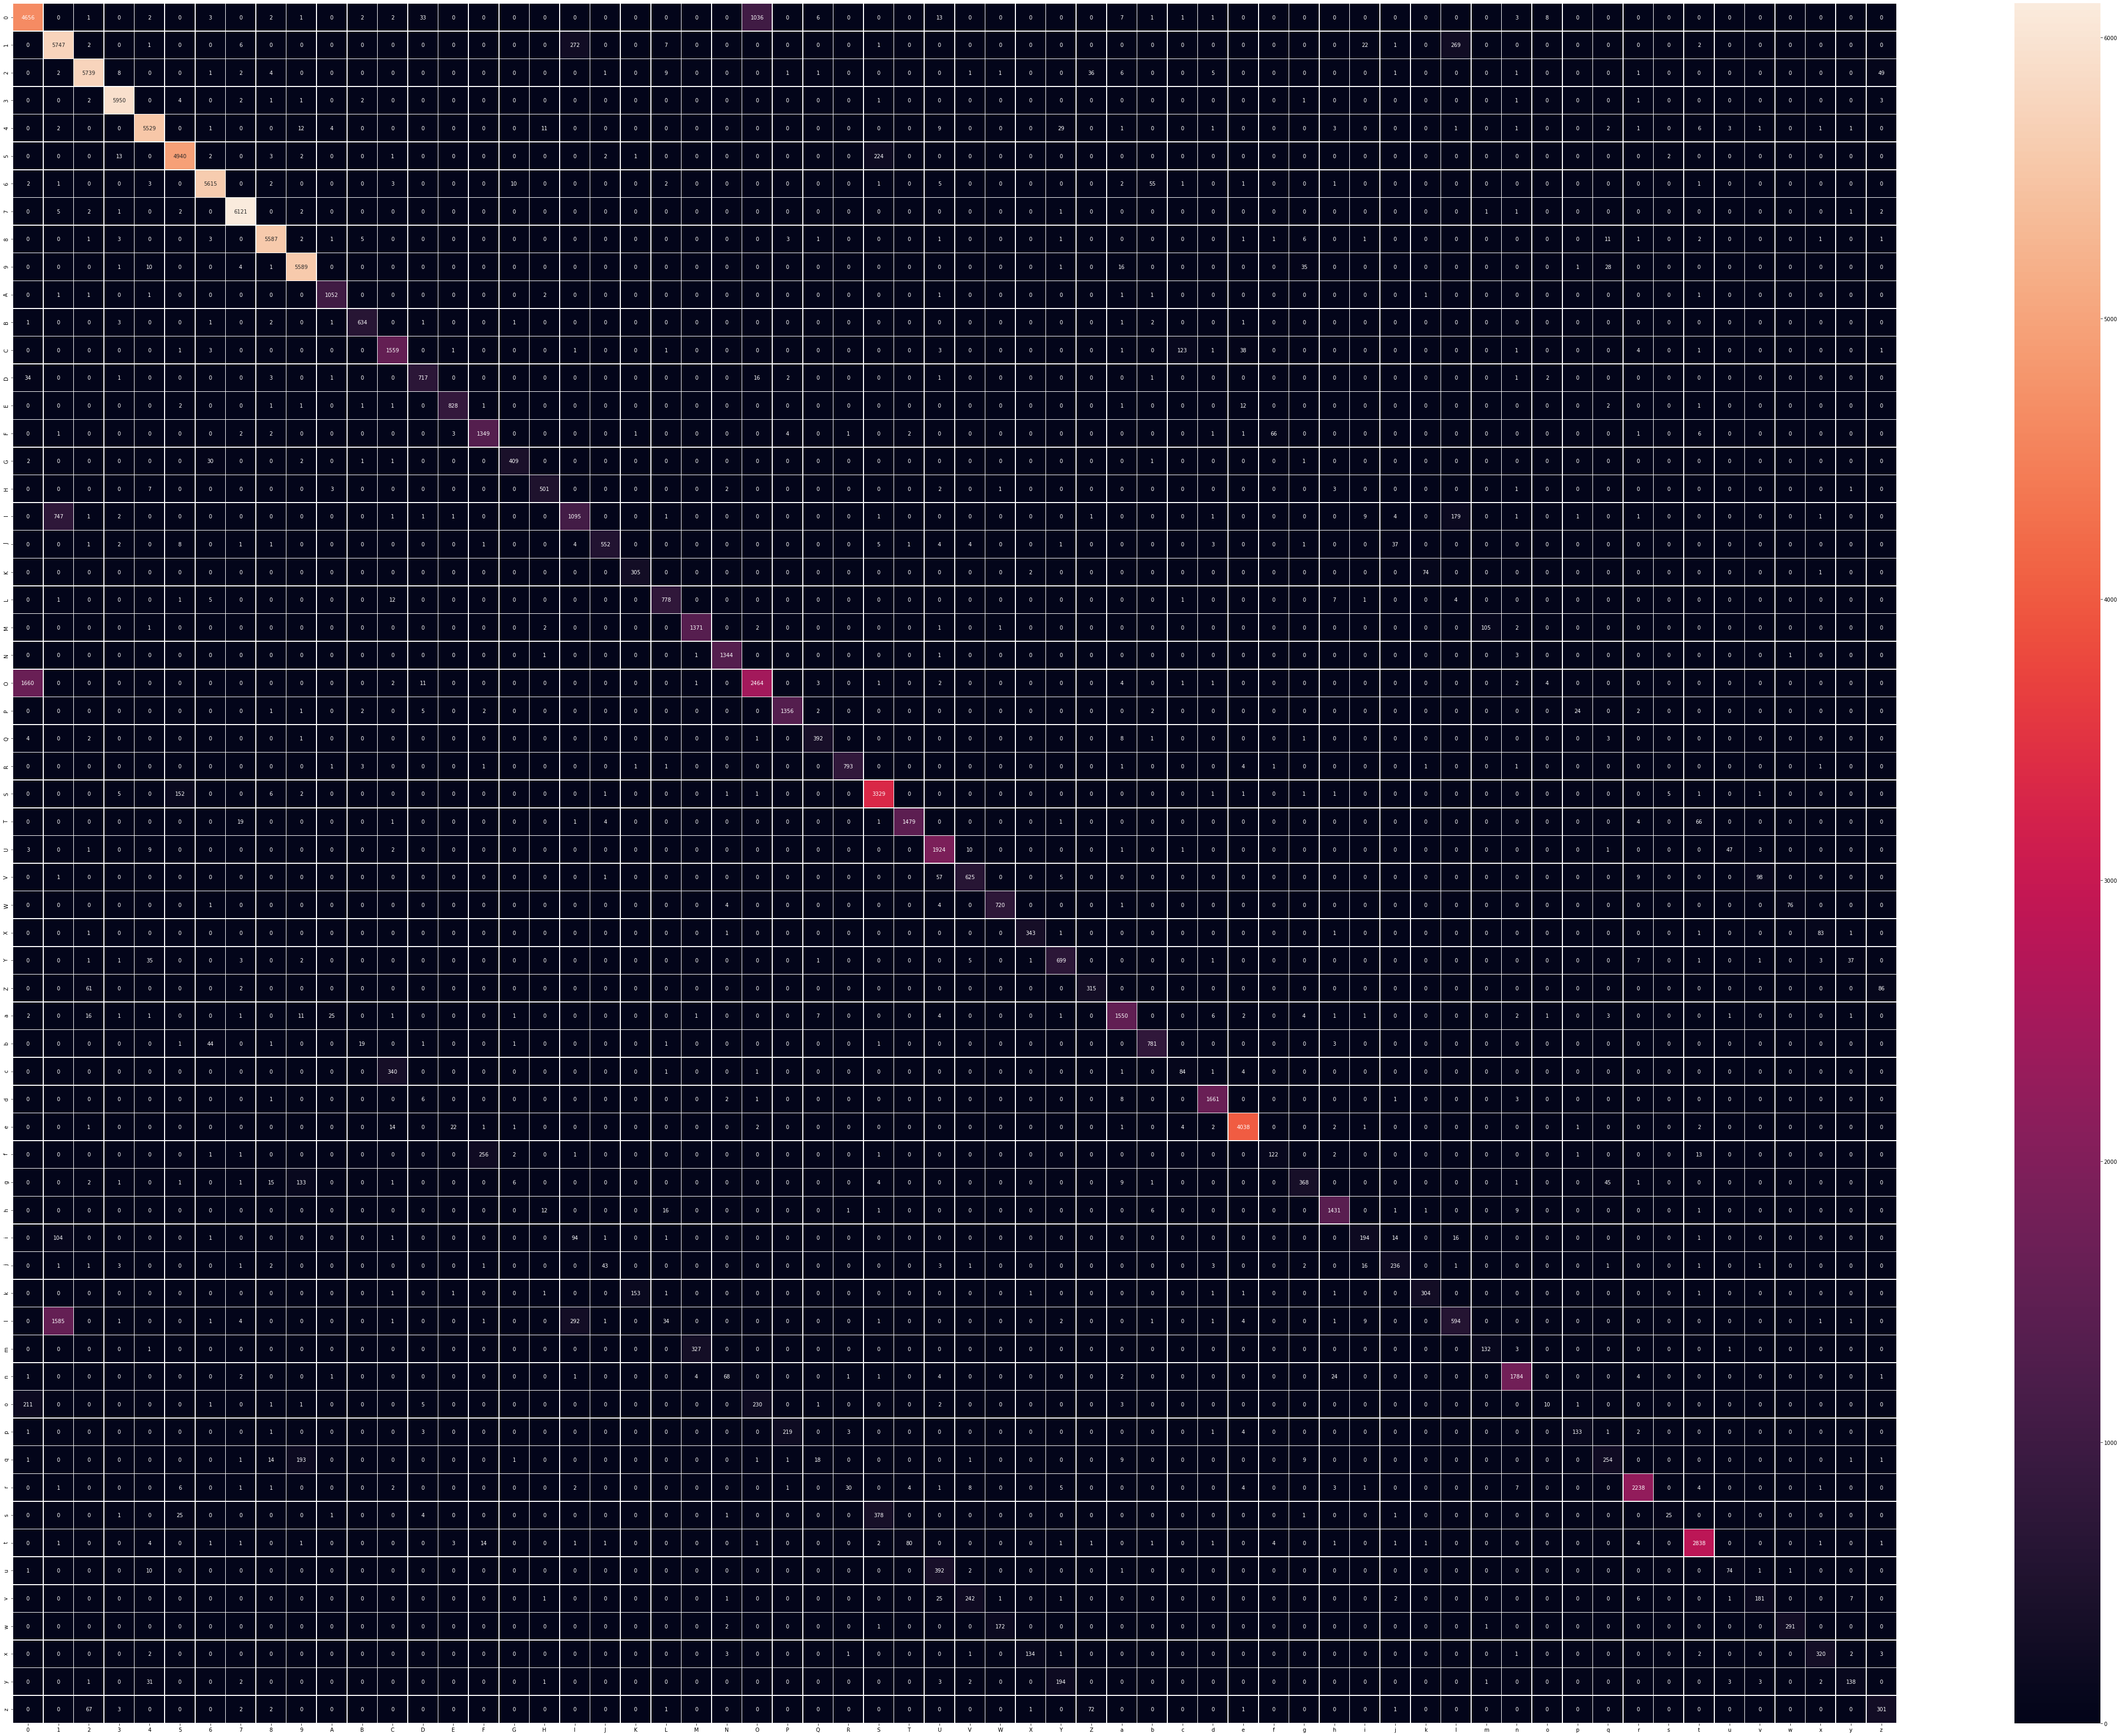

In [23]:
fig, ax = plt.subplots(figsize=(80,60))         # Sample figsize in inches
fig = sns.heatmap(conf_matrix, annot=True, fmt='d', linewidths=.5, ax=ax, xticklabels=axis_labels, yticklabels=axis_labels)

In [24]:
fig = fig.get_figure()

In [25]:
fig.savefig("image/confusion_matrix.png")

In [ ]:
# start from 0 to 61
# 0,1,2,3,4,5,6,7,8,9,A...Z,a...Z

In [58]:
def prefixString(num):
    if num < 10:
        return "數字"
    elif num >= 10 and num < 36:
        return "英文大寫"
    elif num >= 36 and num < 62:
        return "英文小寫"

for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        if i != j:
            num = conf_matrix[i][j]
            # filter
            if num > 100:
                #print('True label: {t_label}, Pred label: {p_label}: {num}'.format(t_label=axis_labels[j], p_label=axis_labels[i], num=num))
                
                # print for report
                # print('> * **{t_pre_str}\'{t_char}\'** 辨識成 **{p_pre_str}\'{p_char}\'** 達 **{num}** 個樣本<br>'.format(t_pre_str=prefixString(j), t_char=axis_labels[j], p_pre_str=prefixString(i), p_char=axis_labels[i], num=num))
                
                print('{t_pre_str}\'{t_char}\' | {p_pre_str}\'{p_char}\' | {num} '.format(t_pre_str=prefixString(j), t_char=axis_labels[j], p_pre_str=prefixString(i), p_char=axis_labels[i], num=num))

英文大寫'O' | 數字'0' | 1036 
英文大寫'I' | 數字'1' | 272 
英文小寫'l' | 數字'1' | 269 
英文大寫'S' | 數字'5' | 224 
英文小寫'c' | 英文大寫'C' | 123 
數字'1' | 英文大寫'I' | 747 
英文小寫'l' | 英文大寫'I' | 179 
英文小寫'm' | 英文大寫'M' | 105 
數字'0' | 英文大寫'O' | 1660 
數字'5' | 英文大寫'S' | 152 
英文大寫'C' | 英文小寫'c' | 340 
英文大寫'F' | 英文小寫'f' | 256 
數字'9' | 英文小寫'g' | 133 
數字'1' | 英文小寫'i' | 104 
英文大寫'K' | 英文小寫'k' | 153 
數字'1' | 英文小寫'l' | 1585 
英文大寫'I' | 英文小寫'l' | 292 
英文大寫'M' | 英文小寫'm' | 327 
數字'0' | 英文小寫'o' | 211 
英文大寫'O' | 英文小寫'o' | 230 
英文大寫'P' | 英文小寫'p' | 219 
數字'9' | 英文小寫'q' | 193 
英文大寫'S' | 英文小寫's' | 378 
英文大寫'U' | 英文小寫'u' | 392 
英文大寫'V' | 英文小寫'v' | 242 
英文大寫'W' | 英文小寫'w' | 172 
英文大寫'X' | 英文小寫'x' | 134 
英文大寫'Y' | 英文小寫'y' | 194 
